Q1  ***What is the difference between multithreading and multiprocessing***?

Ans-

The Core Analogy: Kitchen vs. Cooks
Think of a program as a restaurant kitchen.

Multiprocessing is like having multiple, separate kitchens. Each kitchen has its own space, tools, ingredients, and staff. They work completely independently.

Multithreading is like having one kitchen with multiple cooks. They share the same space, the same oven, the same sink, and the same pantry.

 **In details**

1. **Multiprocessing**
A process is an independent instance of a running program with its own allocated memory space, code, and data. The operating system protects processes from each other.

Key Advantage: True Parallelism and Stability
Because processes don't share memory, they can run on different CPU cores at the exact same time. This is perfect for CPU-intensive tasks where you need to split a heavy computational load across multiple cores. If one process crashes, the others are unaffected.

Key Disadvantage: Overhead and Complexity
Creating a process is resource-intensive. Communication between processes is also more complex and slower, as they cannot simply share variables and must use mechanisms provided by the operating system.

**Example**:
A video rendering application splitting a movie into 4 parts and using 4 different processes to render each part on 4 different CPU cores.



2. **Multithreading**
A thread is a lightweight "sub-process" that exists within a single process. All threads within a process share the same memory space and resources (e.g., open files, global variables).

Key Advantage: Efficiency and Responsiveness
Threads are cheap to create and destroy. They are ideal for I/O-bound tasks where the program often has to wait (e.g., for a network response, disk read, or user input). While one thread is waiting, others can do work, making the application feel responsive.

Key Disadvantage: Complexity and Vulnerability
The shared memory is a double-edged sword. It allows for easy communication but introduces the risk of race conditions, where two threads modify the same data at the same time, leading to corruption. This requires careful use of synchronization primitives like Locks and Semaphores, which can be tricky to implement correctly. A single unhandled exception in one thread can bring down the entire application.

**Example**
A web browser. One thread can handle downloading an image, another can render the page on the screen, and a third can listen for user clicks, all simultaneously to prevent the UI from freezing.




Q 2 **What are the challenges associated with memory management in Python?**


Ans-



1 **Gil limitation**
The Challenge: The GIL is a mutex that allows only one thread to execute Python bytecode at a time. While it simplifies memory management by preventing simultaneous memory access conflicts, it becomes a major bottleneck for CPU-bound multithreaded applications



The Impact: Even on a multi-core system, multiple threads cannot truly execute in parallel to process data and utilize memory efficiently. Your program might not use all available CPU cores, leading to suboptimal memory throughput for computational tasks.

The Workaround: To achieve true parallelism and better utilize memory across cores, you must use the multiprocessing module, which creates separate Python processes (each with its own GIL and memory space). However, this introduces the overhead of Inter-Process Communication (IPC).

2. ***Memory Fragmentation***
The Challenge: As objects are created and destroyed, free memory can become divided into small, non-contiguous blocks. Even if there's a significant amount of total free memory, it may be unavailable for a new, large object because no single contiguous block is large enough.

The Impact: This can lead to MemoryError exceptions even when the total available memory seems sufficient. It's more common in long-running processes that allocate and deallocate many objects of varying sizes.

Python's Approach: Python's memory allocator has strategies to reduce fragmentation, but it cannot eliminate it entirely.

3. **Overhead of Object Creation**
The Challenge: In Python, everything is an object, and each object carries significant memory overhead.

Reference Count: An integer to track the number of references to the object.

Type Pointer: A pointer to the object's type.

Value Storage: The actual data for the object.

Other metadata (e.g., for garbage collection tracking).

The Impact: A simple integer (int) in Python can take ~24-28 bytes, compared to 4 bytes in a language like C. This overhead is negligible for a few objects but becomes substantial when dealing with millions of objects (e.g., in data science with large lists or dictionaries).

4. **Reference Cycles and the Garbage Collector** (GC)
The Challenge: Python's primary memory management mechanism is reference counting. An object is immediately deleted when its reference count drops to zero. However, this fails with reference cycles, where a group of objects reference each other, even if they are no longer accessible from the rest of the program.

python
# Example of a reference cycle
list_a = []
list_b = [list_a]

list_a.append(list_b)  # list_a refers to list_b, which refers to list_a

The Impact: Objects involved in cycles cannot be freed by reference counting alone, leading to memory leaks.

Python's Solution: The generational garbage collector (GC) exists to clean these cycles. However, this introduces its own challenges:

Performance Overhead: The GC runs periodically and can cause unpredictable pauses, especially when collecting a large number of objects.

Tunability: The GC's behavior can be tuned (e.g., disabling it, adjusting thresholds), but this adds complexity and risk.

5. **Difficulty in Tracking Memory Leaks**
The Challenge: Because Python is a high-level language, it's not always obvious why memory usage is growing. A "memory leak" in Python is often not a leak in the traditional C-sense, but rather an unintended lingering reference to an object, preventing it from being garbage collected.

Common Causes:

Unbounded caches that are never purged.

Objects registered in global lists or modules that are never removed.

Tracebacks in exceptions that can create reference cycles.

C extensions that do not properly manage memory.

The Impact: Debugging these "logical" memory leaks is difficult. It requires tools like gc module, tracemalloc, objgraph, or external memory profilers to find the root cause.

6. **Interaction with C Extensions**
The Challenge: Many high-performance Python libraries (like NumPy, Pandas, TensorFlow) are implemented in C. These extensions manage their own memory outside of Python's GC.

The Impact: If a C extension has a memory leak or is not managed correctly, it can cause the entire Python process's memory usage to balloon. Python's own memory tools are often blind to this memory, making it very hard to debug.

7. **Non-Blocking Nature of Freeing Memory**
The Challenge: When an object's reference count hits zero, it is deleted immediately. For large objects or objects with complex __del__ methods (destructors), this deallocation can cause noticeable, unpredictable slowdowns in the main thread of your application.

The Impact: This can lead to performance hiccups that are difficult to profile and isolate.

Q 3 **Write a Python program that logs an error message to a log file when a
division by zero exception occurs**

.

In [1]:

import logging

# Configure logging
logging.basicConfig(filename='error.log', level=logging.ERROR,
                    format='%(asctime)s - %(levelname)s - %(message)s')

def divide(a, b):
    try:
        result = a / b
        print(f"Result: {result}")
    except ZeroDivisionError as e:
        logging.error("Division by zero error occurred: %s", e)
        print("Error: Cannot divide by zero!")

# Example usage
divide(10, 0)




ERROR:root:Division by zero error occurred: division by zero


Error: Cannot divide by zero!


Q4 ***Write a Python program that reads from one file and writes its content to
another file***.



In [2]:
# Program to copy a file line by line

source_file = "input.txt"
destination_file = "output.txt"

try:
    with open(source_file, 'r') as src, open(destination_file, 'w') as dest:
        for line in src:
            dest.write(line)
    print("File copied successfully!")
except FileNotFoundError:
    print("Error: The source file does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: The source file does not exist.




Q5 ***Write a program that handles both IndexError and KeyError using a
try-except block***.

In [3]:
# Program to handle IndexError and KeyError

numbers = [1, 2, 3]
person = {"name": "John", "age": 30}

try:
    # Attempt to access elements that might cause errors
    for i in range(5):  # This will go beyond the list length
        print(f"Number at index {i}: {numbers[i]}")

    # Access a non-existent key in dictionary
    print(f"City: {person['city']}")

except IndexError:
    print("Error: Tried to access an invalid list index.")
except KeyError:
    print("Error: Tried to access a key that doesn't exist in the dictionary.")

Number at index 0: 1
Number at index 1: 2
Number at index 2: 3
Error: Tried to access an invalid list index.


Q6 ***What are the differences between NumPy arrays and Python lists***?


**Python Lists**: Heterogeneous - can mix different data type.




In [4]:
# example
my_list = [1, "hello", 3.14, [1, 2]]
print([type(item) for item in my_list])
# Output: [<class 'int'>, <class 'str'>, <class 'float'>, <class 'list'>]

[<class 'int'>, <class 'str'>, <class 'float'>, <class 'list'>]


**Numpy array**-homogeneous it is store same type of data

NumPy Array: You can perform the operation directly on the entire array. This is a vectorized operation, which is executed in optimized, pre-compiled C code under the hood.

NumPy Array: True multi-dimensional indexing is built-in

In [5]:
import numpy as np

# Creating an array with mixed types forces them to a common type (string)
my_array = np.array([1, "hello", 3.14])
print(my_array)
# Output: ['1' 'hello' '3.14']
print(my_array.dtype)
# Output: <U6  (Unicode string of max length 6)

# A proper numerical array
my_int_array = np.array([1, 2, 3])
print(my_int_array.dtype)
# Output: int64

['1' 'hello' '3.14']
<U32
int64




Q7 ***Explain the difference between apply() and map() in Pandas***.

***map()***: A Series method used for substituting each value in a Series with another value. It's a simple, fast mapping from one value to another.

***apply()***: A much more flexible method that works on both DataFrames and Series. It can apply a function along an axis (rows or columns) of a DataFrame or to each element of a Series

***Example for map()***

In [6]:

import pandas as pd

s = pd.Series([1, 2, 3, 4])
print(s.map(lambda x: x**2))

0     1
1     4
2     9
3    16
dtype: int64


***Example for apply()***

In [7]:

import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})

# Apply function to each column
print(df.apply(lambda x: x * 2))

   A   B
0  2  20
1  4  40
2  6  60







Q8 ***Create a histogram using Seaborn to visualize a distribution***.

A simple example of creating a histogram using Seaborn to visualize a distribution

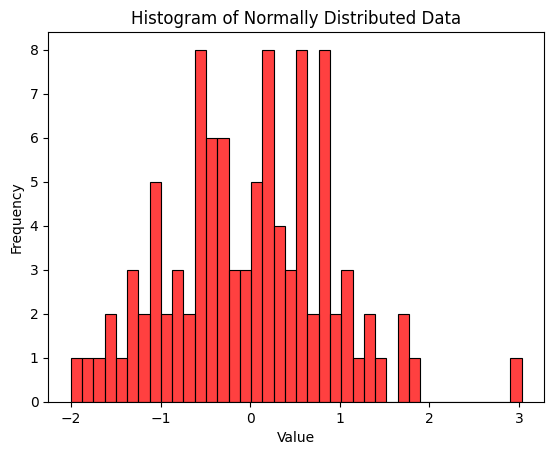

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
data = np.random.randn(100)
# Create histogram
sns.histplot(data, bins=40, kde=False, color='red')

# Add title and labels
plt.title("Histogram of Normally Distributed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()





Q9 ***Use Pandas to load a CSV file and display its first 5 rows***.

In [14]:
import pandas as pd

# Create a sample data.csv file for demonstration
Subjects_Marks = {'ashish': [85, 90, 70, 65, 75]} # Added the missing closing brace here

sample_df = pd.DataFrame(Subjects_Marks)
sample_df.to_csv('data.csv', index=False)

print("Sample 'data.csv' created successfully.")

# Load the CSV file with some options
df = pd.read_csv(
    "data.csv",
    sep=",",
    na_values=["Hindi", "Maths", "English", "Science", "Statistics"]
)

# Display the first 5 rows
print(df.head(5))

print(df.info())

Sample 'data.csv' created successfully.
   ashish
0      85
1      90
2      70
3      65
4      75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ashish  5 non-null      int64
dtypes: int64(1)
memory usage: 172.0 bytes
None





Q10  ***Calculate the correlation matrix using Seaborn and visualize it with a
heatmap***.

          A         B         C         D
A  1.000000 -0.982715  0.983954  0.137871
B -0.982715  1.000000 -0.993754 -0.072727
C  0.983954 -0.993754  1.000000  0.068268
D  0.137871 -0.072727  0.068268  1.000000


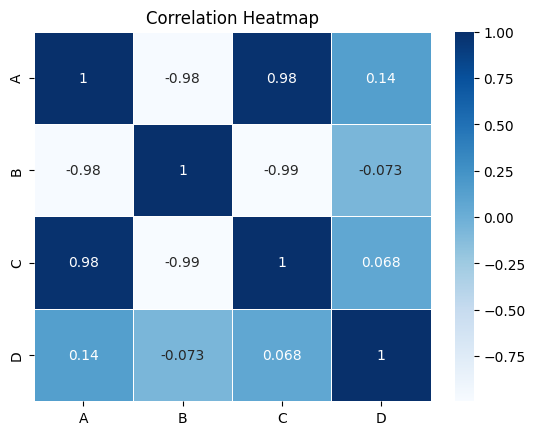

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    "A": [20, 30, 35, 55, 65],
    "B": [55, 46, 38, 29, 15],
    "C": [28, 34, 46, 57, 69],
    "D": [55, 35, 19, 38, 53]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()